Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
target = 129
psc_naspm_bef = pd.read_pickle('/data/psc_naspm_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_naspm_after_'+str(target))

In [3]:
psc_naspm_stim = pd.read_pickle('/data/ana_naspm')

In [4]:
psc_naspm_stim.head()

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
127,"{'trace_y1': [[3.91075230119e-12, 4.6289389224...","{'trace_y1': [[2.23767736628e-12, 3.0542838709...",2017091301,25,"[0, 7, 8, 9, 10, 11, 12, 15, 19]","[32, 33]"
128,"{'trace_y1': [[2.40188379001e-12, 3.4024944954...","{'trace_y1': [[1.80020346346e-12, 2.5917761736...",2017091202,30,[2],"[54, 55, 56, 57, 58]"
129,"{'trace_y1': [[1.63904357495e-12, 1.9299867776...","{'trace_y1': [[2.21088610674e-13, 6.7220720023...",2017092702,20,"[2, 22, 29]","[17, 24, 31]"
130,"{'trace_y1': [[2.38692750219e-12, 3.2848180043...","{'trace_y1': [[4.53755612731e-12, 5.4053749649...",2017092901,40,"[9, 14, 22]","[57, 66]"
132,"{'trace_y1': [[1.49105997003e-12, 2.1684962021...","{'trace_y1': [[3.11954982257e-12, 3.9173601646...",2017102501,40,"[5, 23, 51]","[37, 40, 41, 47, 49, 51, 52, 53, 54, 55, 56, 5..."


In [5]:
decay_tau_stim_bef = np.array(psc_naspm_stim.loc[target].Before['decay_tau'])
decay_tau_stim_aft = np.array(psc_naspm_stim.loc[target].After['decay_tau'])

decay_tau_stim_bef = decay_tau_stim_bef[~np.isnan(decay_tau_stim_bef)]
decay_tau_stim_aft = decay_tau_stim_aft[~np.isnan(decay_tau_stim_aft)]

In [6]:
decay_tau_stim_bef

array([ 0.00125879,  0.00115543,  0.00131933,  0.00148395,  0.00156805,
        0.00100794,  0.00124362,  0.00132319,  0.0010978 ,  0.00153981])

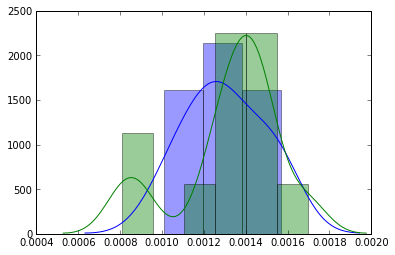

In [7]:
sns.distplot(decay_tau_stim_bef)
sns.distplot(decay_tau_stim_aft)

In [8]:
para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)

In [9]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

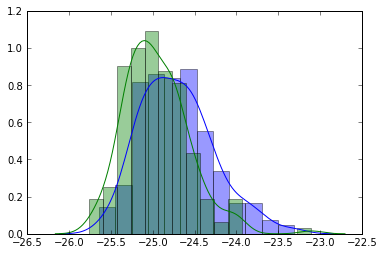

In [10]:
sns.distplot(log_amp_bef)
sns.distplot(log_amp_aft)

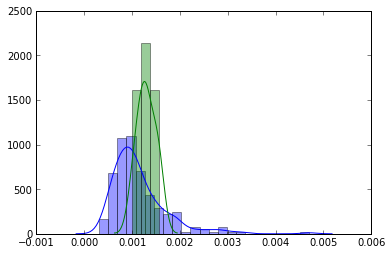

In [11]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(decay_tau_stim_bef)

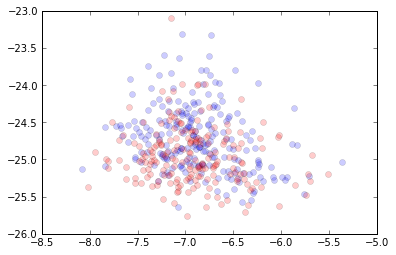

In [12]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

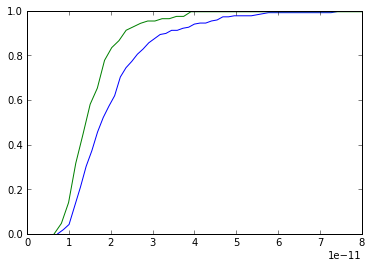

In [13]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

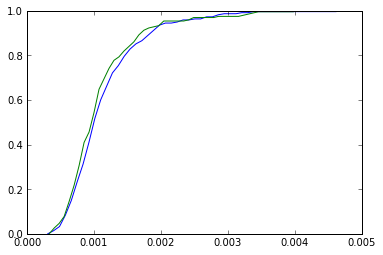

In [14]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['decay_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['decay_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)